# File benchs.py
This contains the code used to create the plots of presentations and report about the fast inference of Forests (BDT in particular)
#### Usage
Create the folder `./tmp/`, then run 
```bash
$ python bench.py
```
You can also easily tune which benchmarks you want/add more by understanding the function execute bench that can be used as:
```python
# set some fixed falues for all benchs
STD_NUM_SAMPLES = 100_000
STD_NUM_FEATURES = 5
STD_DEPTH = 3
STD_NUM_TREES = 200

# define what is constant through this benchmark
timeVSdepth = dict(
    num_samples=STD_NUM_SAMPLES,
    num_features=STD_NUM_FEATURES,
    num_trees=STD_NUM_TREES,
    data_folder=DATA_FOLDER,
    save_models=True,
)

# execute bench for a range of values. 
# Repeat the same command for other ranges & varying other values
execute_bench(
        "./tmp/timeVSmiddleEvents/",
        [1000, 5000, 10000],
        1,  # repetitions
        "num_samples",
        timeVSevents,
    )
```


In [2]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb
import timeit

import subprocess

from bench import *
from utils import *

import json # for testing jsonness
import numpy as np
from os import listdir
from os.path import isfile, join

In [3]:
FIG_FOLDER = "./figures/"
TMP_FOLDER = "tmp/"

In [4]:
if not os.path.exists(FIG_FOLDER):
    os.makedirs(FIG_FOLDER)

### Tests

In [5]:
LABELS = ["branched", "branchless", "branchless_unordered", "branchedJIT", "branchlessJIT",
             "branchlessJIT_unordered", "branched Batch", "branchless Batch", 
             "branchedJIT Batch", "branchlessJIT Batch", "xgb"]

In [39]:
def plot_labels(data_dict, bench_name, fig_folder, labels=["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"], is_xlog=False, is_ylog=False, 
                x_units=" [-]", y_units=" [ms]", scaled=False, fname_postfix="", with_error_bars=False, indices=[]):
    fig=plt.figure()
    for i, label in enumerate(labels):
        if indices:
            if i not in indices:
                continue
        to_plot = data_dict["mins"][:,i]
        if scaled is True:
            to_plot = to_plot/data_dict["abscisse"]
        if with_error_bars is True:
            plt.errorbar(data_dict["abscisse"], to_plot, data_dict["stds"][:,i], linestyle='--', marker='^', label=label)
        else:
            plt.plot(data_dict["abscisse"], to_plot,"--+", label=label )
        
    bench_name.find("VS")
    y_label = bench_name[:bench_name.find("VS")]
    x_label = bench_name[bench_name.find("VS")+2:]
    
    if scaled is True:
        y_label = y_label+"/"+x_label
    plt.xlabel(x_label+x_units)
    plt.ylabel(y_label+y_units)
    
    plt.grid()
    
    if is_xlog:
        plt.xscale('log')
    if is_ylog:
        plt.yscale('log')
    lgd = plt.legend(bbox_to_anchor=(1, 1));
    fig.subplots_adjust(left=0.2)
    plt.show()
    fig.savefig(fig_folder+bench_name+fname_postfix+".pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [40]:
def get_values_from_bench(path_to_files):
    onlyfiles = sorted([f for f in listdir(path_to_files) if isfile(join(path_to_files, f))])
    print(f"Files: {onlyfiles}")
    
    
    
    min_values = []
    std_values = []
    for file in onlyfiles:
        if file[0:3] == "std":
            std_values.append(file)
        elif file[0:3] == "0_a":
            continue
        else:
            min_values.append(file)
     
    mins_list = []
    for f in min_values:
        mins_list.append(np.load(path_to_files+f))
    mins_array = np.array(mins_list)
    
    
    stds_list = []
    for f in std_values:
        stds_list.append(np.load(path_to_files+f))
    stds = np.array(stds_list)
    
    abscisse=np.load(path_to_files+"0_abscisse.npy")
    abscisse = abscisse[:]
    
    
    
    print(f"Abscisse shape: {abscisse.shape}")
    print(f"Mins shape: {mins_array.shape}")
    print(f"Std_dev: {stds.shape}")
    
    return dict(abscisse=abscisse, mins=mins_array, stds=stds)
    

## timeVSdepth

In [41]:
bench_name = "timeVSdepth"

mypath="./"+TMP_FOLDER+bench_name+"/"

data_dict = get_values_from_bench(mypath)
#$data_dict["abscisse"] = data_dict["abscisse"][:-3]

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy']
Abscisse shape: (4,)
Mins shape: (4, 11)
Std_dev: (4, 11)


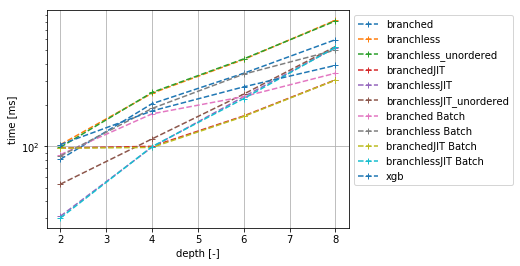

In [42]:
my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "branched Batch", "branchless Batch", "branchedJIT Batch", "branchlessJIT Batch", "xgb"]
my_labels = ["branched", "branchedJIT", "branched Batch", "branchedJIT Batch", "xgb"]

my_labels = LABELS[:]

plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_ylog=True, scaled=False, fname_postfix="_lalala")

In [38]:
for i in [0,1,2,3,4,5,6,7]:
    print(i//4)

0
0
0
0
1
1
1
1


In [14]:
data_dict["abscisse"]

array([2, 4, 6, 8])

In [73]:
plt.plot(data_dict["abscisse"], data_dict["mins"][:,i])


IndexError: index 7 is out of bounds for axis 1 with size 6

In [ ]:
values = dict()

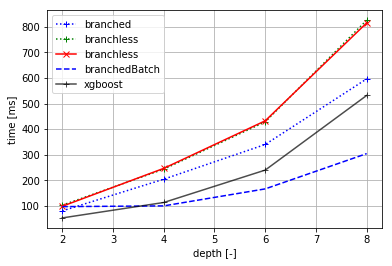

In [15]:
colors = ["blue", "orange", "green", "red","blue", "orange", "green", "red", "k"]
my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]


colors = ["blue", "green", "red","blue", "green", "k"]
my_labels = ["branched", "branchless", "branchless", "branchedBatch", "branchlessBatch", "xgb"]
linestyles = [":+",":+","-x","--","--,"]

fig_folder = FIG_FOLDER
x_units=" [-]"
y_units=" [ms]"
scaled=False
fname_postfix="_old"
with_error_bars=False
indices=[]
is_xlog=False
is_ylog=False
single_events_indices = [0,1,2,3]
labels=my_labels

fig=plt.figure()

#linestyles = [":+","--,"]
#colors = ["orange", "cyan", "green", "red"]
for i in [0,1,2,3]:
    label = labels[i]
    to_plot = data_dict["mins"][:,i]
    if scaled is True:
        to_plot = to_plot/data_dict["abscisse"]
    plt.plot(data_dict["abscisse"], to_plot,linestyles[i], color=colors[i], label=label )
to_plot = data_dict["mins"][:,len(my_labels)-1]
if scaled is True:
    to_plot = to_plot/data_dict["abscisse"]
plt.plot(data_dict["abscisse"], to_plot,"-+k", label="xgboost", alpha=0.7)
bench_name.find("VS")
y_label = bench_name[:bench_name.find("VS")]
x_label = bench_name[bench_name.find("VS")+2:]

if scaled is True:
    y_label = y_label+"/"+x_label
plt.xlabel(x_label+x_units)
plt.ylabel(y_label+y_units)

plt.grid()

if is_xlog:
    plt.xscale('log')
if is_ylog:
    plt.yscale('log')
#plt.legend(loc=9);
plt.legend();
plt.show()
fig.savefig(fig_folder+bench_name+fname_postfix+".pdf", format="pdf")

# timeVSfeats

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy']
Abscisse shape: (6,)
Mins shape: (6, 9)
Std_dev: (6, 9)


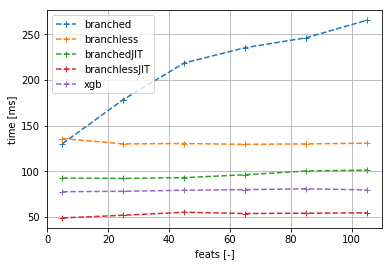

In [482]:
bench_name = "timeVSfeats"

mypath="./"+TMP_FOLDER+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]
plot_labels(data_dict ,bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="")

# timeVStrees

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy']
Abscisse shape: (5,)
Mins shape: (5, 9)
Std_dev: (5, 9)


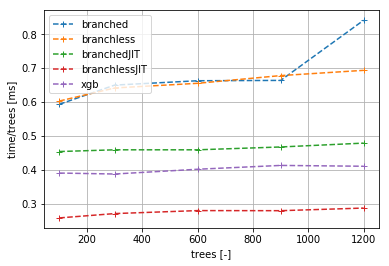

In [483]:
bench_name = "timeVStrees"

mypath="./"+TMP_FOLDER+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=True, fname_postfix="")

# timeVSevents

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy']
Abscisse shape: (6,)
Mins shape: (6, 11)
Std_dev: (6, 11)


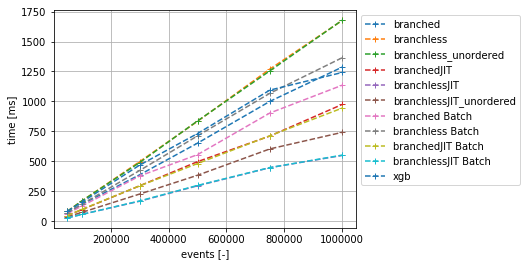

In [43]:
bench_name = "timeVSevents"

#bench_name = "timeVStrees"
mypath="./"+TMP_FOLDER+bench_name+"/"
mypath="./"+"tmp/"+bench_name+"/"

data_dict = get_values_from_bench(mypath)
#data_dict["abscisse"] = data_dict["abscisse"][:-1]
my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "branched unordered", "branchless unordered", "branchedJIT unordered", "branchlessJIT unoreder", "xgb"]


my_labels = LABELS


plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=False ,is_ylog=False, scaled=False, fname_postfix="", indices=[]) # ,indices=[1,-1]

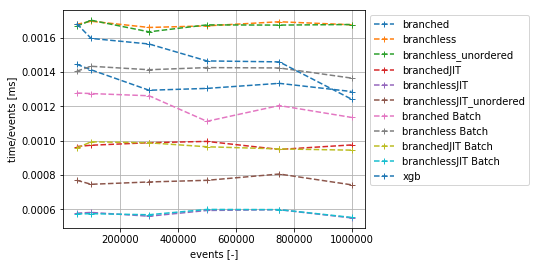

In [44]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=True, fname_postfix="_scaled")

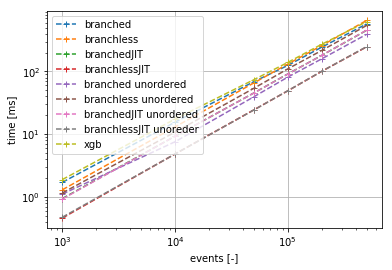

In [501]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=True ,is_ylog=True, scaled=False, fname_postfix="")

In [502]:
for j in range(0,5,4):
    print(j)

0
4


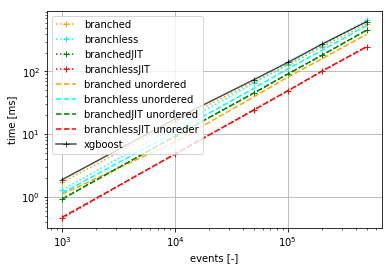

In [503]:
fig_folder = FIG_FOLDER
x_units=" [-]"
y_units=" [ms]"
scaled=False
fname_postfix="_order"
with_error_bars=False
indices=[]
is_xlog=True
is_ylog=True
single_events_indices = [0,1,2,3]
labels=my_labels

fig=plt.figure()

linestyles = [":+","--,"]
colors = ["orange", "cyan", "green", "red"]
for k, j in enumerate(range(0,5,4)):
    for i in [0,1,2,3]:
        label = labels[j+i]
        to_plot = data_dict["mins"][:,j+i]
        if scaled is True:
            to_plot = to_plot/data_dict["abscisse"]
        plt.plot(data_dict["abscisse"], to_plot,linestyles[k], color=colors[i], label=label )
to_plot = data_dict["mins"][:,8]
if scaled is True:
    to_plot = to_plot/data_dict["abscisse"]
plt.plot(data_dict["abscisse"], to_plot,"-+k", label="xgboost", alpha=0.7)
bench_name.find("VS")
y_label = bench_name[:bench_name.find("VS")]
x_label = bench_name[bench_name.find("VS")+2:]

if scaled is True:
    y_label = y_label+"/"+x_label
plt.xlabel(x_label+x_units)
plt.ylabel(y_label+y_units)

plt.grid()

if is_xlog:
    plt.xscale('log')
if is_ylog:
    plt.yscale('log')
#plt.legend(loc=9);
plt.legend();
plt.show()
fig.savefig(fig_folder+bench_name+fname_postfix+".pdf", format="pdf")

In [2]:
FIG_FOLDER = "./figures"

In [9]:
colors = ["blue", "orange", "green", "red","blue", "orange", "green", "red", "k"]
my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "branchedBatch", "branchlessBatch", "branchedJITBatch", "branchlessJITBatch", "xgb"]

my_labels = ["branched", "branchless", "branchless_unordered", "branchedJIT", "branchlessJIT",
             "branchlessJIT_unordered", "branched Batch", "branchless Batch", 
             "branchedJIT Batch", "branchlessJIT Batch", "xgb"]

fig_folder = FIG_FOLDER
x_units=" [-]"
y_units=" [ms]"
scaled=True
fname_postfix="_batch4"
with_error_bars=False
indices=[]
is_xlog=True
is_ylog=False
single_events_indices = [0,1,2,3]
labels=my_labels

fig=plt.figure()

linestyles = [":+","--,"]
#colors = ["orange", "cyan", "green", "red"]
for i in range(8):
    label = labels[i]
    to_plot = data_dict["mins"][:,i]
    if scaled is True:
        to_plot = to_plot/data_dict["abscisse"]
    plt.plot(data_dict["abscisse"], to_plot,linestyles[i//4], color=colors[i], label=label )
to_plot = data_dict["mins"][:,8]
if scaled is True:
    to_plot = to_plot/data_dict["abscisse"]
plt.plot(data_dict["abscisse"], to_plot,"-+k", label="xgboost", alpha=0.7)
bench_name.find("VS")
y_label = bench_name[:bench_name.find("VS")]
x_label = bench_name[bench_name.find("VS")+2:]

if scaled is True:
    y_label = y_label+"/"+x_label
plt.xlabel(x_label+x_units)
plt.ylabel(y_label+y_units)
plt.gcf().subplots_adjust(left=0.15)
plt.grid()

if is_xlog:
    plt.xscale('log')
if is_ylog:
    plt.yscale('log')
plt.legend(loc=9);
#plt.legend();
plt.show()
fig.savefig(fig_folder+bench_name+fname_postfix+".pdf", format="pdf")

NameError: name 'data_dict' is not defined

<Figure size 432x288 with 0 Axes>

# timeVSmiddleEvents

In [30]:
bench_name = "timeVSmiddleEvents"

mypath="./"+TMP_FOLDER+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "branched Batch", "branchless Batch", "branchedJIT Batch", "branchlessJIT Batch", "xgb"]
my_labels = ["branched", "branchless", "branchlessJIT", "branched Batch", "branchless Batch", "branchlessJIT Batch", "xgb"]

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy']
Abscisse shape: (5,)
Mins shape: (5, 7)
Std_dev: (5, 7)


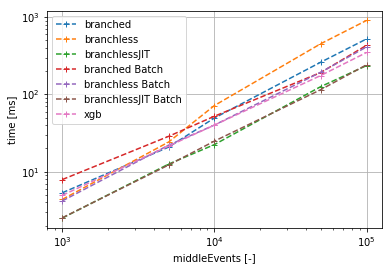

In [31]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=True ,is_ylog=True, scaled=False, fname_postfix="_log", indices=[])

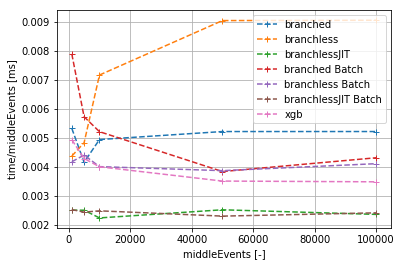

In [32]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=True, fname_postfix="_relative", indices=[])

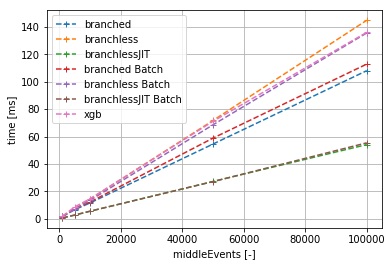

In [17]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="_bars", with_error_bars=False)

In [494]:
bench_name = "timeVSfewEvents"

mypath="./"+TMP_FOLDER+bench_name+"/"
data_dict2 = get_values_from_bench(mypath)

bench_name = "timeVSmiddleEvents"

mypath="./"+TMP_FOLDER+bench_name+"/"
data_dict = get_values_from_bench(mypath)

data_dict["abscisse"] = np.concatenate((data_dict2["abscisse"],data_dict["abscisse"]))
data_dict["mins"] = np.concatenate((data_dict2["mins"], data_dict["mins"]))
data_dict["stds"] = np.concatenate((data_dict2["stds"], data_dict["stds"]))

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'min_006_.npy', 'min_007_.npy', 'min_008_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy', 'std_006_.npy', 'std_007_.npy', 'std_008_.npy']
Abscisse shape: (9,)
Mins shape: (9, 9)
Std_dev: (9, 9)
Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'min_006_.npy', 'min_007_.npy', 'min_008_.npy', 'min_009_.npy', 'min_010_.npy', 'min_011_.npy', 'min_012_.npy', 'min_013_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy', 'std_006_.npy', 'std_007_.npy', 'std_008_.npy', 'std_009_.npy', 'std_010_.npy', 'std_011_.npy', 'std_012_.npy', 'std_013_.npy']
Abscisse shape: (14,)
Mins shape: (14, 9)
Std_dev: (14, 9)


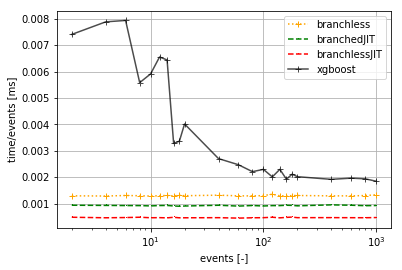

In [495]:
colors = ["blue", "orange", "green", "red","blue", "orange", "green", "red", "k"]
my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "branched", "branchlessBatch", "branchedJIT", "branchlessJIT", "xgb"]

fig_folder = FIG_FOLDER
x_units=" [-]"
y_units=" [ms]"
scaled=True
fname_postfix="_pers6"
with_error_bars=True
indices=[]
is_xlog=True
is_ylog=False
single_events_indices = [0,1,2,3]
labels=my_labels

fig=plt.figure()

linestyles = [":+","--,"]
#colors = ["orange", "cyan", "green", "red"]
for i in [1,6,7]: #[1,5,7]:
    label = labels[i]
    to_plot = data_dict["mins"][:,i]
    if scaled is True:
        to_plot = to_plot/data_dict["abscisse"]
    plt.plot(data_dict["abscisse"], to_plot,linestyles[i//4], color=colors[i], label=label )
to_plot = data_dict["mins"][:,8]
if scaled is True:
    to_plot = to_plot/data_dict["abscisse"]
plt.plot(data_dict["abscisse"], to_plot,"-+k", label="xgboost", alpha=0.7)
bench_name.find("VS")
y_label = bench_name[:bench_name.find("VS")]
x_label = "events" #bench_name[bench_name.find("VS")+2:]

if scaled is True:
    y_label = y_label+"/"+x_label
plt.xlabel(x_label+x_units)
plt.ylabel(y_label+y_units)
#plt.axvline(x=256, label="batch_size")
plt.grid()

if is_xlog:
    plt.xscale('log')
if is_ylog:
    plt.yscale('log')
#plt.legend(loc=9);
plt.legend();
plt.show()
fig.savefig(fig_folder+bench_name+fname_postfix+".pdf", format="pdf")

# timeVSfewEvents

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'min_006_.npy', 'min_007_.npy', 'min_008_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy', 'std_006_.npy', 'std_007_.npy', 'std_008_.npy']
Abscisse shape: (9,)
Mins shape: (9, 9)
Std_dev: (9, 9)


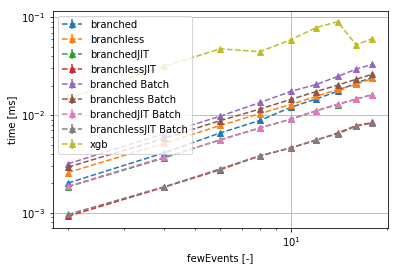

In [496]:
bench_name = "timeVSfewEvents"

mypath="./"+TMP_FOLDER+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "branched Batch", "branchless Batch", "branchedJIT Batch", "branchlessJIT Batch", "xgb"]
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=True ,is_ylog=True, scaled=False, fname_postfix="_log", with_error_bars=True)

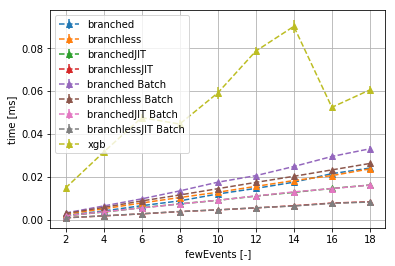

In [497]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="", with_error_bars=True)

# --- End benchs ---

# Old code

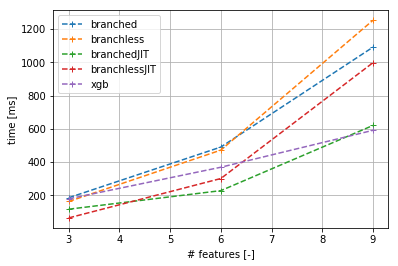

In [320]:
fig=plt.figure()
#plt.errorbar(abscisse, to_plot[:,0], stds[:,0], linestyle='None', marker='^')
labels=["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]
for i, label in enumerate(labels):
    plt.plot(data_dict["abscisse"], data_dict["mins"][:,i],"--+", label=label )
plt.xlabel("# features [-]")
plt.ylabel("time [ms]")
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.legend();
plt.show()
fig.savefig(FIG_FOLDER+"xgboost_events.pdf", format="pdf")

IndexError: index 4 is out of bounds for axis 1 with size 2

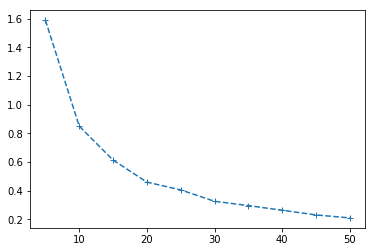

In [237]:
fig=plt.figure()
#plt.errorbar(abscisse, to_plot[:,0], stds[:,0], linestyle='None', marker='^')
plt.plot(abscisse, to_plot[:,0]/abscisse,"--+", label="unique" )
# plt.plot(abscisse, to_plot[:,1]/abscisse,"--+", label="unique clever" )
# plt.plot(abscisse, to_plot[:,2]/abscisse,"--+", label="unique batch" )
# plt.plot(abscisse, to_plot[:,3]/abscisse,"--+", label="unique batch clever" )
plt.plot(abscisse, to_plot[:,4]/abscisse,"--+", label="unique_batch_good" )
plt.plot(abscisse, to_plot[:,5]/abscisse,"--+r", label="unique_batch_good_ordered" )

#plt.plot(abscisse, to_plot[:,6]/abscisse,"--+", label="array" )
#plt.plot(abscisse, to_plot[:,7],"--+", label="JIT_forest" )
#plt.plot(abscisse, to_plot[:,8],"--+", label="JIT_forest_clever" )
#plt.plot(abscisse, to_plot[:,9],"--+", label="JIT_all" )
#plt.plot(abscisse, to_plot[:,9]/abscisse,"--+", label="Static" )
plt.plot(abscisse, to_plot[:,11]/abscisse,"--+k", label="xgboost" )

plt.xlabel("#events [-]")
plt.ylabel("time/event [ms]")
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.legend()



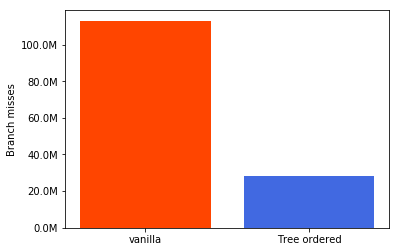

In [282]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
money = [113e6, 28e6]


def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.gcf().subplots_adjust(left=0.15)
plt.bar(x, money, color=['#FF4500', '#4169E1'])
plt.ylabel("Branch misses")
plt.xticks(x, ('vanilla', 'Tree ordered'))
plt.show()
fig.savefig(fig_folder+"branch_misses"+".pdf", format="pdf")

In [84]:
to_plot[0,[1,2]]

array([0.52389296, 5.17142086])

In [86]:
to_plot.shape

(14, 3)

In [93]:
np.min(np.stack([to_plot, to_plot, to_plot]), axis=0).shape

(14, 3)